In [112]:
%run "../../../common/0_notebooks_base_setup.py"   

C:\Users\anabella\Documents\DH\Actividades\clase_06\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles, que usaremos para resolver ejercicios de Numpy, Estadística y Probabilidad.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [113]:
import numpy as np
data_location = '../Data/sales_data_sample_exercise.csv'
data = np.genfromtxt(data_location, skip_header=1, delimiter="\t", dtype=str) # Si instanciamos con dtype int o float, perderíamos información
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

## Ejercicio 2

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución normal.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [114]:
countries_vector = data[:,5]
sales_vector = data[:,1].astype(np.float)
usa_sales = sales_vector[countries_vector == "USA"]
mean_sales_usa = round(usa_sales.mean(), 2)
std_sales_usa = round(usa_sales.std(), 2)
median_sales_usa = np.median(usa_sales)
max_sale_usa = usa_sales.max()
min_sale_usa = usa_sales.min()
range_sale_usa = max_sale_usa - min_sale_usa
print("USA data")
print("Sales number:", usa_sales.shape[0])
print("Max sale: $", max_sale_usa)
print("Min sale: $", min_sale_usa)
print("------------------------")
print("Sales mean: $", mean_sales_usa)
print("Median sale: $", median_sales_usa)
print("Range: $", range_sale_usa)
print("Sales std: $", std_sales_usa)

USA data
Sales number: 1004
Max sale: $ 14082.8
Min sale: $ 541.14
------------------------
Sales mean: $ 3613.53
Median sale: $ 3236.06
Range: $ 13541.66
Sales std: $ 1880.0


In [115]:
random_generator = np.random.default_rng(1234) # Seteamos una semilla así los resultados serán reproducibles.
normal_sales_usa = random_generator.normal(loc=mean_sales_usa, scale=std_sales_usa, size=100) # Usamos la media y el desvío estándar que sacamos de los datos existentes.
normal_sales_usa # Se crean 100 datos generados aleatoriamente.

array([  598.31680585,  3734.03783833,  5006.40563625,  3900.4540839 ,
        5237.36851569,  9090.15653831,   833.34208195,  5391.01919233,
         481.19534024,  4259.76981313,  2650.13582654,  6102.19683857,
        1996.20323606,  4590.17721415,  1235.05981101,  -445.65134124,
        4430.82982598,  6872.1139215 ,  4591.38221372,  1729.45830774,
        4118.01961594,  5055.8184369 ,  5853.12141036,  1437.59768228,
        4922.53526308,  4274.13132929,  3552.58964394,  3638.31136874,
        2336.54005697,  2446.92978825,  6116.21272715,  4100.146404  ,
        2708.34023582, -1071.0344824 ,  1965.59010475,  2663.17284032,
        1201.24716049,  1112.51256104,  5166.39605863,  3148.76577225,
         418.08250168,  1103.44261172,  3050.2088876 ,  5709.3669692 ,
         781.48136844,  6602.94070191,  2697.35866782,   396.65788827,
        4578.13960335,  6315.26280619,  3196.53827469,  4833.30502305,
        3015.89455414,  3592.89088026,  6744.51302724,  5297.6084964 ,
      

## Ejercicio 3

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados

Ayuda: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [116]:
usa_sales_ex = np.concatenate((usa_sales, normal_sales_usa))

In [117]:
mean_sales_usa_ex = np.around(usa_sales_ex.mean(), 2)
median_sales_usa_ex = np.around(np.median(usa_sales_ex), 2)
range_sale_usa_ex = np.around(np.max(usa_sales_ex) - np.min(usa_sales_ex), 2)
std_sales_usa_ex = np.around(np.std(usa_sales_ex), 2)

In [118]:
print("USA data extended (Normal)")
print("Sales number:", usa_sales_ex.shape[0])
print("Sales mean: $", mean_sales_usa_ex)
print("Median sale: $", median_sales_usa_ex)
print("Range: $", range_sale_usa_ex)
print("Sales std: $", std_sales_usa_ex)

# Todas las medidas de tendencia central y de variabilidad del set extendido de precios de ventas de USA tienen magnitudes ligeramente más altas
# en comparación con el set original.

# El set extendido tiene 100 datos más que el set original.

USA data extended (Normal)
Sales number: 1104
Sales mean: $ 3635.21
Median sale: $ 3284.38
Range: $ 15153.83
Sales std: $ 1902.86


## Ejercicio 4

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución uniforme.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [119]:
unif_sales_usa = random_generator.uniform(low=min_sale_usa, high=max_sale_usa, size=100) # Usamos los valores máximo y mínimo de la distribución original.
unif_sales_usa

array([ 7251.10288187, 10840.52576647,  9847.80260777,  3901.56765103,
        8964.68348534,  4815.6420416 ,  4295.11046825, 13133.05853042,
        4327.32407201, 13389.94117653,  3276.79028537,  8198.6564287 ,
        5691.07568916, 11484.24654402,  2268.4284031 , 13423.85674875,
       10410.67227088,  2918.31067515,  9922.24810719,  1798.25324429,
        8075.74089232,  1929.08072451,  1132.81901815,  5858.82132662,
        9899.15913951, 10385.62120273,  9600.93843665,  8551.77307445,
       12444.26660908,  7821.9171326 ,  1865.8176495 ,  2454.5200011 ,
       13572.00979369, 11348.79171562,   632.59728524, 13348.99835006,
        9416.64980992, 12873.32080163,  2607.38958484,  8512.19873006,
        7362.96246968,  2894.80213892,  1392.23737093,  9540.22758602,
         973.19012943,  3766.16216393,  7520.91312235,  8698.06479127,
        4372.88177178, 11958.51983886, 12656.93868917, 10334.34971702,
       13088.04882273,  1340.06049471,  1220.21989797,  2218.68249536,
      

## Ejercicio 5

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados.

In [120]:
usa_sales_ex_2 = np.concatenate((usa_sales, unif_sales_usa))

In [121]:
mean_sales_usa_ex_2 = np.around(usa_sales_ex_2.mean(), 2)
median_sales_usa_ex_2 = np.around(np.median(usa_sales_ex_2), 2)
range_sale_usa_ex_2 = np.around(np.max(usa_sales_ex_2) - np.min(usa_sales_ex_2), 2)
std_sales_usa_ex_2 = np.around(np.std(usa_sales_ex_2), 2)

In [122]:
print("USA data extended (Uniform)")
print("Sales number:", usa_sales_ex_2.shape[0])
print("Sales mean: $", mean_sales_usa_ex_2)
print("Median sale: $", median_sales_usa_ex_2)
print("Range: $", range_sale_usa_ex_2)
print("Sales std: $", std_sales_usa_ex_2)

USA data extended (Uniform)
Sales number: 1104
Sales mean: $ 3945.85
Median sale: $ 3327.0
Range: $ 13541.66
Sales std: $ 2432.95


## Ejercicio 6

¿Cuál de las dos imputaciones de datos preservó mejor la distribución original?

In [123]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue',
                         bin_width=200):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width,
                       color = color)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)  


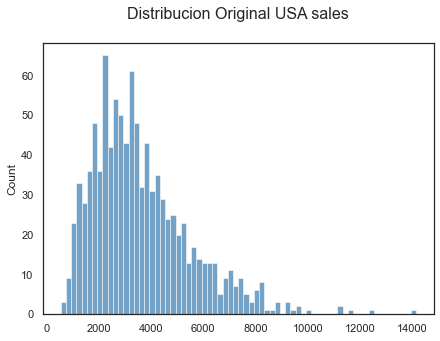

In [124]:
# Original Distribution
distribution_plotter(usa_sales, "Original USA sales")

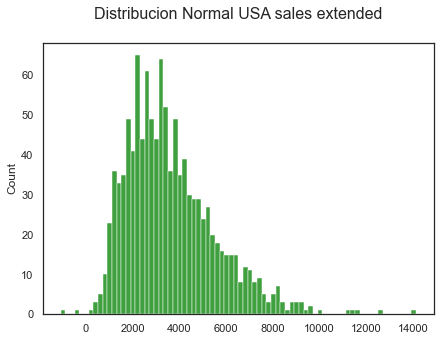

In [125]:
# Normal Distribution
distribution_plotter(usa_sales_ex, "Normal USA sales extended", "green")

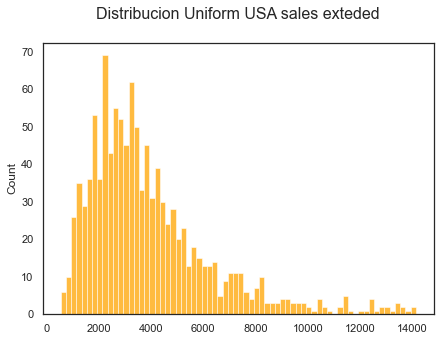

In [126]:
# Uniform Distribution
distribution_plotter(usa_sales_ex_2, "Uniform USA sales exteded", "orange")

In [127]:
print("USA data (Original)")
print("Sales mean: $", mean_sales_usa)
print("Median sale: $", median_sales_usa)
print("Range: $", range_sale_usa)
print("Sales std: $", std_sales_usa)
print("-------------------------------")
print("USA data extended (Normal)")
print("Sales mean: $", mean_sales_usa_ex)
print("Median sale: $", median_sales_usa_ex)
print("Range: $", range_sale_usa_ex)
print("Sales std: $", std_sales_usa_ex)
print("-------------------------------")
print("USA data extended (Uniform)")
print("Sales mean: $", mean_sales_usa_ex_2)
print("Median sale: $", median_sales_usa_ex_2)
print("Range: $", range_sale_usa_ex_2)
print("Sales std: $", std_sales_usa_ex_2)

# Original vs Normal
# Vemos más cambios en las variables de variabilidad de la Ditribución Normal (rango y desvío estándar). Podemos ver en el gráfico que hay más datos dispersos en los extremos
# en comparación con el gráfico de la Distribución Original.

# Original vs Uniform
# El rango lo pudimos controlar con los parámetros que introducimos en la Distribución Uniforme. 
# Por esto mismo, diría que la Distribución Uniforme preservó mejor la Distribución Original.

USA data (Original)
Sales mean: $ 3613.53
Median sale: $ 3236.06
Range: $ 13541.66
Sales std: $ 1880.0
-------------------------------
USA data extended (Normal)
Sales mean: $ 3635.21
Median sale: $ 3284.38
Range: $ 15153.83
Sales std: $ 1902.86
-------------------------------
USA data extended (Uniform)
Sales mean: $ 3945.85
Median sale: $ 3327.0
Range: $ 13541.66
Sales std: $ 2432.95
